# Project Description and Goals

Across the United States, there are police altercations that result in deadly outcomes. A great deal of data on these fatal occurrences exists and it includes information on fatalities caused by police, whether they were on-duty, off-duty, criminal, line-of-duty, local, federal, intentional, or accidental. For our capstone, we address the issue of police violence that has become a heated topic throughout the country. As a team, we attempt to help law enforcement agencies identify risk factors so they may step in before risk transforms into actual harm. 


Our project aims to research what attributes surround fatal police-related encounters and to analyze the attributes about these incidents that may be leading to the fatalities. Two open-sourced datasets we acquired:
- [Mapping Police Violence](https://mappingpoliceviolence.org/aboutthedata) has gathered over 9000 police killings from January 2013 to May 2021. 
    - For the first iteration, we’re taking one of these attributes (the threat level of the victim) and building a model around it to predict if the victim is classified as being an attacker or a non-attacker based on the other top attributes in the MPL dataset. 
    
    
    

- [Fatal Encounters](https://fatalencounters.org/) has information on over 30,000 records from January 2000 to May 2021.
    - For the second iteration, we're doing the same (building a model around the threat level of the victim), but predicting if the victim is classified as threatening, non-threatening, or ambiguous based on the other top attributes in the FE dataset. 

Our hope is to shed light on changes to be made within law enforcement, help identify what response teams should be more available, and to improve the way emergency teams are responding to altercations across the United States. Is there a way to modify law enforcement trainings and policies to decrease officer-involved incidents. Are we able to improve the safety and outcomes for all people involved, both officers and civilians? The overall goal is to save lives, provide insights, and find recommendations that will be of assistance. 

### Objectives for this project include:
- Identifying the drivers of civilian fatalities. 
- Documenting the process and analysis throughout the data science pipeline.
- Constructing a classification model that can predict what the victim's threat level is, given the features of the dataset.
- Deliverables:
    - README.md file containing overall project information. 
    - A well-documented jupyter notebook detailing the data science pipeline process.
    - Python modules that automate the data acquisition, preparation, and exploration process.

### Initial Thoughts and Hypotheses:
- Are victims armed/unarmed or fleeing/not fleeing victims? Do these attributes affect alleged threat level? 
- Did the victim put others in danger?
- Is there a mental illness that contributed to the incident? 
- Are officers wearing their body cameras and does it make a difference in alleged threat level?
- Is race, gender, age or location influencing the threat level of victims?
- Is there even enough information being documented on the police reports? 
- How does mental illness affect each gender?
- Do symptoms of mental illness play a role in threat level?
- Is cause of death and alleged threat level independent of one another?
- What are the fatalities by state: % killings vs pop?
- What are the most common words that appear in the description of incidents?



<a id='toc'></a>



***


### Workflow

#### [Imports](#imports)
#### [Acquire Data](#acquire-data)
#### [Prepare and Split Data](#prepare-and-split-data)
#### [Explore Data](#explore-data)
- [Visualizations](#visualizations)
- [Hypothesis Testing](#hypothesis-testing)

#### [Modeling](#modeling)
- [Feature Importance](#feature-importance)
- [Identify Baseline](#identify-baseline)
- [Model on Train](#model-on-train)
- [Model on Validate](#model-on-validate)
- [Model on Test](#model-on-test)

#### [2nd Iteration: Acquire Data](#2nd-iteration-acquire-data)
#### [2nd Iteration: Prepare and Split Data](#2nd-iteration-prepare-and-split-data)
#### [2nd Iteration: Explore Data](#2nd-iteration-explore-data)
- [2nd Iteration: Visualizations](#2nd-iteration-visualizations)
- [2nd Iteration: Hypothesis Testing](#2nd-iteration-hypothesis-testing)

#### [2nd Iteration: Modeling](#2nd-iteration-modeling)
- [2nd Iteration: Feature Importance](#2nd-iteration-feature-importance)
- [2nd Iteration: Identify Baseline](#2nd-iteration-identify-baseline)
- [2nd Iteration: Model on Train](#2nd-iteration-train)
- [2nd Iteration: Model on Validate](#2nd-iteration-validate)
- [2nd Iteration: Model on Test](#2nd-iteration-test)

#### [Drivers](#drivers)

#### [Conclusion](#conclusion)

___
# <a name="imports"></a>Imports 
Import all necessary libraries and functions. 

In [1]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import graphviz
from graphviz import Graph

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Split data
from sklearn.model_selection import train_test_split

# Explore NLP
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.feature_selection import RFE

# Encode Variables
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Evaluate models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

 [Jump to Table of Contents](#toc)
___
# <a name="acquire-data"></a>Acquire Data

In [2]:
# reads data from Mapping Police Violence website's downloaded dataset
df = pd.read_excel('data.xlsx')
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Encounter Type (DRAFT),Initial Reported Reason for Encounter (DRAFT),Names of Officers Involved (DRAFT),Race of Officers Involved (DRAFT),Known Past Shootings of Officer(s) (DRAFT),Call for Service? (DRAFT)
0,Kalon Horton,29,Male,Black,NaN,2021-05-09,NaN,Lancaster,TX,NaN,...,NaN,NaN,NaN,NaN,Part 1 Violent Crime,gunshots,NaN,NaN,NaN,Yes
1,Name withheld by police,NaN,Male,Unknown Race,NaN,2021-05-09,90 S. Main St.,Leicester,MA,1524.0,...,NaN,Suburban,NaN,NaN,Other,deliberate car crash,NaN,NaN,NaN,Yes
2,Jeffrey Mark Murray,62,Male,Unknown Race,NaN,2021-05-09,NaN,Greenville,SC,NaN,...,NaN,NaN,NaN,NaN,Part 1 Violent Crime,murder,NaN,NaN,NaN,Yes
3,Everton Brown,56,Male,Unknown Race,NaN,2021-05-08,NaN,Baltimore,MD,NaN,...,NaN,NaN,NaN,NaN,Part 1 Violent Crime,murder,NaN,NaN,NaN,Yes
4,Felix Jerry Marquez,34,Male,Hispanic,NaN,2021-05-08,NaN,Riverside,CA,NaN,...,NaN,NaN,NaN,NaN,Person with a gun,person with a gun,NaN,NaN,NaN,No



### Initial Data Summarization

In [3]:
# rows and columns
df.shape

(9147, 35)

In [4]:
# list of column names and data types with information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9147 entries, 0 to 9146
Data columns (total 35 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                      --------------  -----         
 0   Victim's name                                                                                                                                                               9147 non-null   object        
 1   Victim's age                                                                                                                                                                9138 non-null   object        
 2   Victim's gender                                         

In [5]:
# check nulls
df.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     9
Victim's gender                                                                                                                                                                 10
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        4265
Date of Incident (month/day/year)                                                                        

In [6]:
# specify useless columns and what to exclude for counts
useless_columns = df.columns[35:]
exclusions = ["Victim's name", 
              "URL of image of victim", 
              "Date of Incident (month/day/year)", 
              "Street Address of Incident", 
              "City", "State", "Zipcode", "County", 
              "Agency responsible for death", "ORI Agency Identifier (if available)", 
              "A brief description of the circumstances surrounding the death", 
              "Link to news article or photo of official document", 
              "Link to news article or photo of official document", 
              "WaPo ID (If included in WaPo database)", 
              "MPV ID", 
              "Fatal Encounters ID", 
              "Names of Officers Involved (DRAFT)"]

# getting value counts for specific columns
for column in df.columns:
    if column not in exclusions and column not in useless_columns:
        print(column.upper())
        print(df[column].value_counts())
        print("-------------------------------------")

VICTIM'S AGE
Unknown    331
25         299
27         294
31         290
28         289
          ... 
88           1
10           1
7            1
85           1
107          1
Name: Victim's age, Length: 89, dtype: int64
-------------------------------------
VICTIM'S GENDER
Male           8668
Female          453
Transgender       9
Unknown           6
Male              1
Name: Victim's gender, dtype: int64
-------------------------------------
VICTIM'S RACE
White                     3993
Black                     2306
Hispanic                  1631
Unknown Race               896
Asian                      135
Native American            130
Pacific Islander            52
Unknown race                 2
Hispanic                     1
Asian/Pacific Islander       1
Name: Victim's race, dtype: int64
-------------------------------------
CAUSE OF DEATH
Gunshot                                    8434
Gunshot, Taser                              273
Taser                                     

------------------------------------------------------
------------------------------------------------------


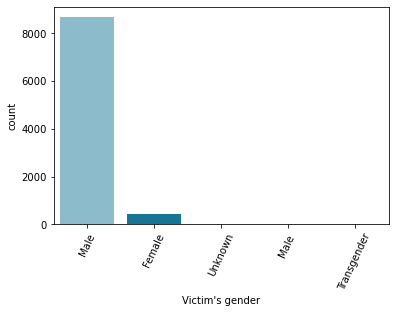

------------------------------------------------------
------------------------------------------------------


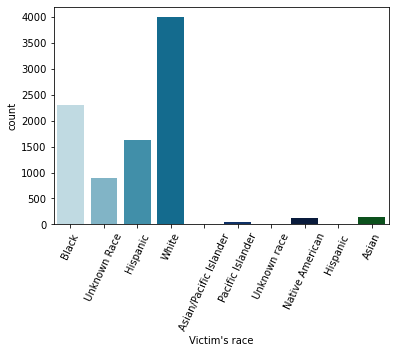

------------------------------------------------------
------------------------------------------------------


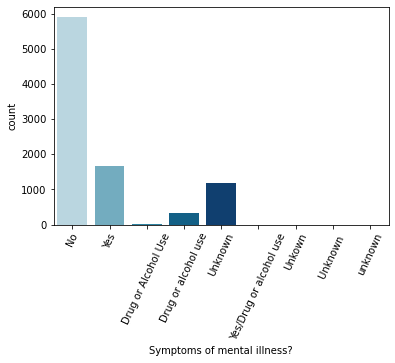

------------------------------------------------------
------------------------------------------------------


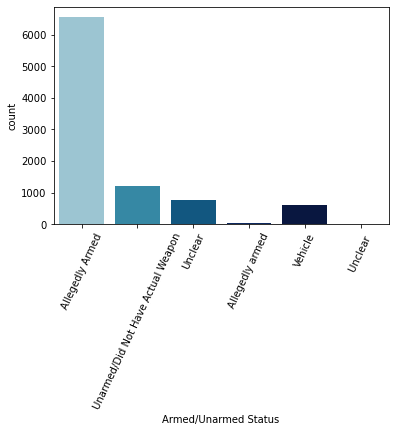

------------------------------------------------------
------------------------------------------------------


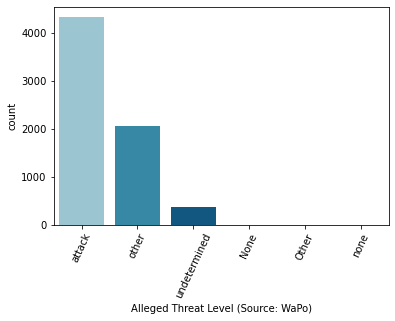

------------------------------------------------------
------------------------------------------------------


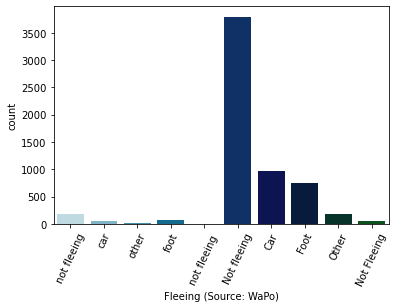

------------------------------------------------------
------------------------------------------------------


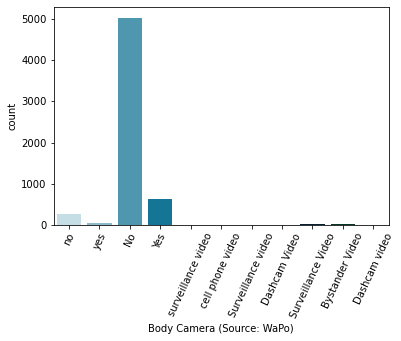

------------------------------------------------------
------------------------------------------------------


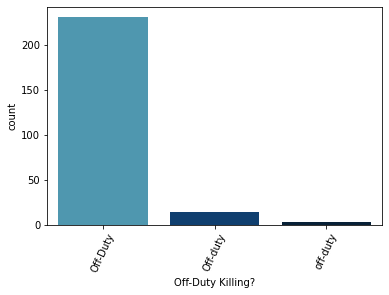

------------------------------------------------------
------------------------------------------------------


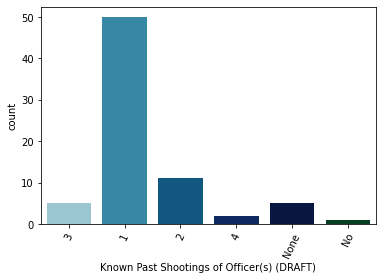

------------------------------------------------------
------------------------------------------------------


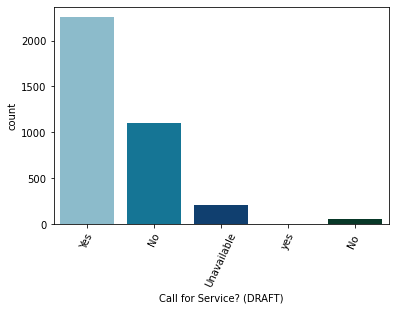

In [7]:
# specify more columns to exclude for univariate distributions
more_exclusions = ["Victim's age", 
                   "Cause of death", 
                   "Official disposition of death (justified or other)", 
                   "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)", 
                   "Encounter Type (DRAFT)", 
                   "Initial Reported Reason for Encounter (DRAFT)", 
                   "Criminal Charges?",
                   "Race of Officers Involved (DRAFT)", 
                   "Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )"]

# univariate distributions
for column in df.columns:
    if column not in exclusions and column not in useless_columns and column not in more_exclusions:
        sns.countplot(x=df[column], data=df, palette = 'ocean_r')
        print("------------------------------------------------------")
        print("------------------------------------------------------")
        plt.xticks(rotation=65)
        plt.show()

### Takeaways
- There are a couple of unnecessary columns (begin with `Unnamed:`).
- Messy column names need to be renamed for better readability.
- A lot of columns are not needed due to nulls/unusable and will need to be dropped. 
- Most values in each column have a wide variety of text variation. These should be lowercased, stripped, and grouped. 
- Many nulls in dataset that need to be filled in or dropped.
- Dummy variables and encoding needs to be done to pretty much all of the dataset in order to model/evaluate. 
- Possibly a good idea to create age bins.
- Possible exploration with time series. Set `Date of Incident` as datetime index?


 [Jump to Table of Contents](#toc)
___
# <a name="prepare-and-split-data"></a>Prepare and Split Data

In [8]:
# grab cleaned data frame from wrangle.py
df = w.wrangle_data(cached=False)
df.head()

,age,gender,race,date,city,state,zipcode,county,agency_responsible,cause_of_death,...,age_bins,unknown,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
7,52,male,unknown race,2021-05-07,rutledge,tn,37861.0,grainger,"bean station police department, rutledge polic...",gunshot,...,45-54,0,0,0,0,0,0,1,0,0
8,47,male,white,2021-05-06,san andreas,ca,95249.0,calaveras,calaveras county sheriff's office,gunshot,...,45-54,0,0,0,0,0,0,1,0,0
9,49,male,white,2021-05-05,las vegas,nv,89104.0,clark,las vegas metropolitan police department,gunshot,...,45-54,0,0,0,0,0,0,1,0,0
13,30,male,black,2021-05-03,biloxi,ms,39532.0,harrison,biloxi police department,gunshot,...,25-34,0,0,0,0,1,0,0,0,0
14,45,male,hispanic,2021-05-03,glendale,az,85301.0,maricopa,glendale police department,gunshot,...,45-54,0,0,0,0,0,0,1,0,0


In [9]:
# double check rows and columns
df.shape

(6265, 60)

In [10]:
# double check no nulls
df.isnull().sum()

age                                            0
gender                                         0
race                                           0
date                                           0
city                                           0
state                                          0
zipcode                                        0
county                                         0
agency_responsible                             0
cause_of_death                                 0
description_of_circumstances                   0
official_disposition                           0
criminal_charges_filed                         0
mental_illness                                 0
armed_unarmed_status                           0
alleged_weapon                                 0
alleged_threat_lvl                             0
fleeing                                        0
body_camera                                    0
geography                                      0
encounter_type_draft

In [11]:
# double check data types
df.dtypes

age                                                     int64
gender                                                 object
race                                                   object
date                                           datetime64[ns]
city                                                   object
state                                                  object
zipcode                                               float64
county                                                 object
agency_responsible                                     object
cause_of_death                                         object
description_of_circumstances                           object
official_disposition                                   object
criminal_charges_filed                                 object
mental_illness                                         object
armed_unarmed_status                                   object
alleged_weapon                                         object
alleged_

In [12]:
# split the data using the split function in explore.py
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

# check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

# work with training data
train.head()

overall shape of dataframe: (6265, 60)
train: (3508, 60)
validate: (1504, 60)
test: (1253, 60)


,age,gender,race,date,city,state,zipcode,county,agency_responsible,cause_of_death,...,age_bins,unknown,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
1953,27,male,black,2019-08-08,moss point,ms,39563.0,jackson,moss point police department,gunshot,...,25-34,0,0,0,0,1,0,0,0,0
3237,20,male,white,2018-06-04,ogden,nc,28411.0,new hanover,new hanover county sheriff's office,gunshot,...,18-24,0,0,0,1,0,0,0,0,0
529,39,male,unknown race,2020-11-12,philadelphia,pa,19111.0,philadelphia,philadelphia police department,gunshot,...,35-44,0,0,0,0,0,1,0,0,0
2333,30,male,black,2019-03-30,durham,nc,27704.0,durham,durham police department,gunshot,...,25-34,0,0,0,0,1,0,0,0,0
1490,23,male,unknown race,2020-01-06,aurora,co,80014.0,arapahoe,denver police department,gunshot,...,18-24,0,0,0,1,0,0,0,0,0


### Takeaways
- About 1/3 of our data has been dropped due to missing information/nulls. 
- Data is prepped/split and ready to be explored, modeled, and evaluated.

 [Jump to Table of Contents](#toc)
___
# <a name="explore-data"></a>Explore Data
Address questions posed in planning


## <a name="visualizations"></a>• Visualizations

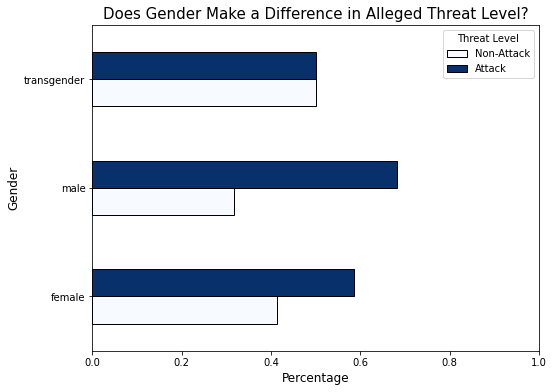

alleged_threat_lvl,0.0,1.0
gender,,
female,0.414013,0.585987
male,0.318195,0.681805
transgender,0.500000,0.500000


In [13]:
# visualize gender vs alleged threat level
ax = pd.crosstab(train.gender, train.alleged_threat_lvl, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Does Gender Make a Difference in Alleged Threat Level?", fontsize = 15)
plt.ylabel("Gender", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.gender, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- Highest percentage of non-attacks is transgender. Second highest is female.
- Highest percentage of attacks are male. Second highest is female.
- Transgender is equally likely to have an attack or non-attack threat level.
- Males appear to have the least amount of a non-attack threat level.

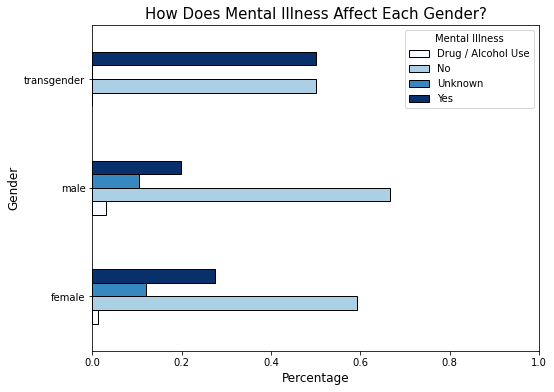

mental_illness,drug or alcohol use,no,unknown,yes
gender,,,,
female,0.012739,0.592357,0.121019,0.273885
male,0.029878,0.666866,0.104272,0.198984
transgender,0.000000,0.500000,0.000000,0.500000


In [14]:
# visualize mental illness per gender
ax = pd.crosstab(train.gender, train.mental_illness, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Drug / Alcohol Use', 'No', 'Unknown', 'Yes'], 
          bbox_to_anchor=(1,1), 
          title='Mental Illness')

# customize chart
plt.title("How Does Mental Illness Affect Each Gender?", fontsize = 15)
plt.ylabel("Gender", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.gender, train.mental_illness, normalize = 'index')
percentages

### Takeaways
- Males are most often categorized as not having a mental illness, however, they have a high threat level (according to previous visual). 
- Transgender appear to have an equal percentage in having/not having a mental illness. 
- Both male and female genders have higher percentages of no mental illness. Could this be related to limited mental health awareness/support across the country?
- Males have a higher percentage of drug / alchohol use instances.
- Unknown mental status is almost equal across male and female genders.

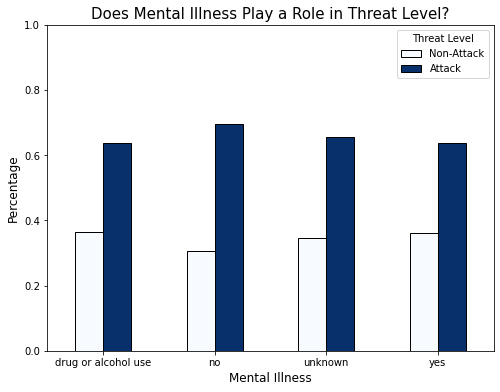

alleged_threat_lvl,0.0,1.0
mental_illness,,
drug or alcohol use,0.362745,0.637255
no,0.305544,0.694456
unknown,0.345109,0.654891
yes,0.361463,0.638537


In [15]:
# visualize mental illness vs threat level
ax = pd.crosstab(train.mental_illness, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Does Mental Illness Play a Role in Threat Level?", fontsize = 15)
plt.ylabel("Percentage", fontsize = 12)
plt.xlabel('Mental Illness', fontsize = 12)
ax.tick_params(labelsize=10)
plt.ylim([0.0, 1.0])
plt.xticks(rotation=0)
plt.show()

# get percentages df
percentages = pd.crosstab(train.mental_illness, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- All instances of the categories have been more likely to have an attack threat level, than a non-attack.
- Highest percentage of non-attacks are people under the influence of drugs/alcohol.
- There is not much variation in the attack threat level and non-attack threat level among the categories. 

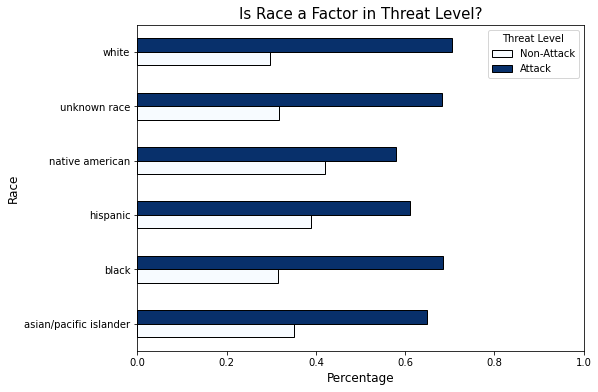

alleged_threat_lvl,0.0,1.0
race,,
asian/pacific islander,0.351351,0.648649
black,0.314879,0.685121
hispanic,0.389490,0.610510
native american,0.420000,0.580000
unknown race,0.316667,0.683333
white,0.296178,0.703822


In [16]:
# visualize race vs alleged threat level
ax = pd.crosstab(train.race, train.alleged_threat_lvl, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Is Race a Factor in Threat Level?", fontsize = 15)
plt.ylabel("Race", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.race, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- The highest occurrence of non-attacks are seen in Native Americans. Second highest is Hispanics.
- The highest occurrence of attacks are seen in White races. Second highest appears to be Black races. 
- There is a large amount of unknown races considered as having an attack threat level.

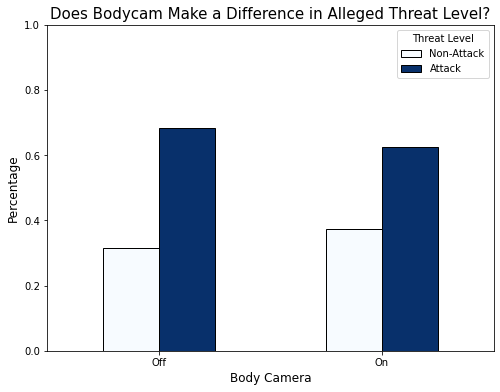

alleged_threat_lvl,0.0,1.0
body_camera,,
0.0,0.316677,0.683323
1.0,0.374317,0.625683


In [17]:
# visualize body camera vs alleged threat level
ax = pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Does Bodycam Make a Difference in Alleged Threat Level?", fontsize = 15)
plt.ylabel("Percentage", fontsize = 12)
plt.xlabel('Body Camera', fontsize = 12)
ax.tick_params(labelsize=10)
x_labels = ['Off', 'On']
ax.set_xticklabels(x_labels)
plt.xticks(rotation=0)
plt.ylim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- There seems to be more attacks than non-attacks overall, regardless if body camera is on or off. 
- When bodycam is on, there is a higher chance of a non-attack threat level, than when the body camera is off. 
- In contrast, when the body camera is off, there is a higher chance of an attack threat level, than when the body camera is on. 

 [Jump to Table of Contents](#toc)


## <a name="hypothesis-testing"></a>• Hypothesis Testing

In [18]:
# t-test for gender vs threat level
female = train[train.gender == 'female']
male = train[train.gender == 'male']
transg = train[train.gender == 'transgender']
not_male = train[train.gender != 'male']

male_att = male.alleged_threat_lvl
non_male_att = not_male.alleged_threat_lvl

null_hypothesis = "There is not a difference between male attackers and the remaining population."
alternative_hypothesis = "Attacker status for males & total population are different."
confidence_level = .95
a = 1 - confidence_level

t, p = stats.ttest_ind(male_att, non_male_att)
print(t, p)

if p < a:
    print("We reject the null hypothesis.")
    print(f"We can move forward with alternative hypothesis: {alternative_hypothesis}")
else:
    print("We fail to reject the null hypothesis")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

2.5985965696595774 0.009399773051373846
We reject the null hypothesis.
We can move forward with alternative hypothesis: Attacker status for males & total population are different.


In [19]:
# chi2 test for mental illness vs alleged threat level
exp.chi2_matts(train, 'mental_illness', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  37   65]
 [ 711 1616]
 [ 127  241]
 [ 257  454]]
---
Expected

[[  32.91448119   69.08551881]
 [ 750.90193843 1576.09806157]
 [ 118.75028506  249.24971494]
 [ 229.43329532  481.56670468]]
---

chi^2 = 9.6156
p     = 0.0221

Because the p-value: 0.0221 is less than alpha: 0.05, we can reject the null hypothesis


In [20]:
# chi2 test for race vs alleged threat level
exp.chi2_matts(train, 'race', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  26   48]
 [ 273  594]
 [ 252  395]
 [  21   29]
 [  95  205]
 [ 465 1105]]
---
Expected

[[  23.87913341   50.12086659]
 [ 279.77309008  587.22690992]
 [ 208.78107184  438.21892816]
 [  16.1345496    33.8654504 ]
 [  96.80729761  203.19270239]
 [ 506.62485747 1063.37514253]]
---

chi^2 = 20.9946
p     = 0.0008

Because the p-value: 0.0008 is less than alpha: 0.05, we can reject the null hypothesis


In [21]:
# chi2 test for bodycam vs alleged threat level
exp.chi2_matts(train, 'body_camera', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 995 2147]
 [ 137  229]]
---
Expected

[[1013.89509692 2128.10490308]
 [ 118.10490308  247.89509692]]
---

chi^2 = 4.7228
p     = 0.0298

Because the p-value: 0.0298 is less than alpha: 0.05, we can reject the null hypothesis


### Takeaways
- All four statistical tests rejected the null hypothesis.
    - T-test demonstrates there is a difference between male attackers and the remaining population.
    - 1st Chi^2 test demonstrates that mental status is dependent on alleged threat level.
    - 2nd Chi^2 test demonstrates that race is dependent on alleged threat level.
    - 3rd Chi^2 test demonstrates that bodycam is dependent on alleged threat level.

 [Jump to Table of Contents](#toc)
___
# <a name="modeling"></a>Modeling

In [22]:
# set up X inputs and y target variable for each split
X_train = train.drop(columns=['alleged_threat_lvl'])
y_train = train.alleged_threat_lvl

X_validate = validate.drop(columns=['alleged_threat_lvl'])
y_validate = validate.alleged_threat_lvl

X_test = test.drop(columns=['alleged_threat_lvl'])
y_test = test.alleged_threat_lvl

In [23]:
# dropping columns that are not numeric datatypes
dropcols = ['date', 
            'gender',
            'race',
            'city',
            'state',
            'zipcode',
            'county',
            'agency_responsible',
            'cause_of_death',
            'description_of_circumstances',
            'official_disposition',
            'criminal_charges_filed',
            'mental_illness',
            'armed_unarmed_status',
            'alleged_threat_lvl',
            'alleged_weapon',
            'fleeing',
            'geography',
            'encounter_type_draft',
            'initial_reported_reason_for_encounter_draft',
            'known_past_shootings_of_officer_draft',
            'age_bins']

X_train = train.drop(columns=dropcols)
X_validate = validate.drop(columns=dropcols)
X_test = test.drop(columns=dropcols)

 [Jump to Table of Contents](#toc)

## <a name="feature-importance"></a>• Feature Importance

#### Select K Best
- Uses statistical tests to determine each feature's usefulness in predicting the target variable. 
- Ranks the features and then select the K best features.

In [24]:
f_features = select_kbest(X_train, y_train, 15)
f_features

['age',
 'body_camera',
 'is_female',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_violent_crime_part_1',
 'is_hispanic',
 'is_white',
 'mntlill_no',
 'mntlill_yes',
 'under 12',
 '65+']

#### Recursive Feature Elimination (RFE)
- Recursively removes attributes to meet the number of required features and then builds a model on those attributes that remain to see if you can you match or improve performance with a smaller subset.

In [25]:
rfe_features = rfe(X_train, y_train, 15)
rfe_features

['is_male',
 'is_transgender',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_black',
 'is_unknown race',
 'is_white',
 'mntlill_no',
 'cod_lethal',
 'under 12',
 '65+']

In [26]:
combo_feats = list(set(f_features + rfe_features))
print(len(combo_feats))
combo_feats

21


['is_white',
 'is_black',
 'cod_lethal',
 'is_female',
 'is_male',
 'body_camera',
 'was_traffic_stop',
 'under 12',
 'was_unarmed',
 'is_unknown race',
 'was_allegedly_armed',
 'is_transgender',
 'was_mental_health_welfare_check',
 'was_violent_crime_part_1',
 'was_vehicle',
 'age',
 'is_hispanic',
 'mntlill_no',
 '65+',
 'was_person_with_a_weapon',
 'mntlill_yes']

In [27]:
# specify combined features that reduces multicollinearity
combo_feats = ['55-64',
               'is_native american',
               'mntlill_no',
               'under 12',
               'was_traffic_stop',
               'body_camera',
               'age',
               'was_allegedly_armed',
               'is_black',
               'was_domestic_disturbance',
               'was_fleeing',
               'cod_lethal',
               'was_mental_health_welfare_check',
               'is_white',
               'was_violent_crime_part_1',
               'was_vehicle',
               'mntlill_drug or alcohol use',
               'is_transgender',
               'is_female']
 
print(len(combo_feats))

19


 [Jump to Table of Contents](#toc)

## <a name="identify-baseline"></a>• Identify Baseline

In [28]:
# baseline prediction: the most prevalent class in training dataset(the mode)
train.alleged_threat_lvl.value_counts()

1.0    2376
0.0    1132
Name: alleged_threat_lvl, dtype: int64

In [29]:
# baseline model would be to predict 1 (an attack) since it is most prevalant
# baseline accuracy:
baseline_accuracy = (train.alleged_threat_lvl == 1).mean()

print(f'baseline accuracy: {baseline_accuracy: .4}')

baseline accuracy:  0.6773


 [Jump to Table of Contents](#toc)

## <a name="model-on-train"></a>• Model on Train

### Decision Tree

In [30]:
# create Decision Tree model (specifying max_depth argument and combo_feats)
dt = DecisionTreeClassifier(max_depth=3, random_state=123)

# fit model on combo_feats
dt.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = dt.predict(X_train[combo_feats])

# compute accuracy
dt_train_acc = round(dt.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))

Baseline is 0.6773
----------------
Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): 0.6927


### Random Forest

In [31]:
# create Random Forest model (specifying max_depth/min_samples_leaf arguments and combo_feats)
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

# fit model on combo_feats
rf.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = rf.predict(X_train[combo_feats])

# compute accuracy
rf_train_acc = round(rf.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))

Baseline is 0.6773
----------------
Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): 0.6936


### K-Nearest Neighbor (KNN)

In [32]:
# create KNN model (specifying n_neighbors argument and combo_feats)
knn = KNeighborsClassifier(n_neighbors=20)

# fit model on combo_feats
knn.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = knn.predict(X_train[combo_feats])

# compute accuracy
knn_train_acc = round(knn.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of KNN classifier on combo_feats (n_neighbors = 20): {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))

Baseline is 0.6773
----------------
Accuracy of KNN classifier on combo_feats (n_neighbors = 20): 0.6910


### Logistic Regression

In [33]:
# create Logistic Regression model (default parameters, specifying combo_feats)
logit = LogisticRegression(random_state=123)

# fit model on combo_feats
logit.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = logit.predict(X_train[combo_feats])

# compute accuracy
logit_train_acc = round(logit.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Logistic Regression classifier on combo_feats (default parameters): {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))

Baseline is 0.6773
----------------
Accuracy of Logistic Regression classifier on combo_feats (default parameters): 0.6893


### Takeways:
- Our baseline accuracy is at 68%.
- All of the models got an accuracy score of 69% on in-sample data, beating the baseline by 1%. 

Next, compare scores to validate (out-of-sample data).

[Jump to Table of Contents](#toc)
## <a name="model-on-validate"></a>• Model on Validate

In [34]:
# dt's metrics on validate

# evaluate on validate sample
y_pred = dt.predict(X_validate[combo_feats])

# compute accuracy
dt_val_acc = round(dt.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Decision Tree classifier on train set: {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on train set: 0.6927
--------------------------------------------------------------
Decision Tree classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.55      0.17      0.26       486
         1.0       0.70      0.94      0.80      1018

    accuracy                           0.69      1504
   macro avg       0.63      0.55      0.53      1504
weighted avg       0.65      0.69      0.63      1504



In [35]:
# rf's metrics on validate

# evaluate on validate sample
y_pred = rf.predict(X_validate[combo_feats])

# compute accuracy
rf_val_acc = round(rf.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Random Forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Random Forest classifier on train set: 0.6936
--------------------------------------------------------------
Random Forest classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.68      0.04      0.08       486
         1.0       0.68      0.99      0.81      1018

    accuracy                           0.68      1504
   macro avg       0.68      0.52      0.45      1504
weighted avg       0.68      0.68      0.57      1504



In [36]:
# knn's metrics on validate

# evaluate on validate sample
y_pred = knn.predict(X_validate[combo_feats])

# compute accuracy
knn_val_acc = round(knn.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of KNN classifier on train set: {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of KNN classifier on train set: 0.6910
--------------------------------------------------------------
KNN classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.44      0.10      0.16       486
         1.0       0.69      0.94      0.79      1018

    accuracy                           0.67      1504
   macro avg       0.56      0.52      0.48      1504
weighted avg       0.61      0.67      0.59      1504



In [37]:
# logit's metrics on validate

# evaluate on validate sample
y_pred = logit.predict(X_validate[combo_feats])

# compute accuracy
logit_val_acc = round(logit.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Logistic Regression classifier on train set: {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Logistic Regression classifier on train set: 0.6893
--------------------------------------------------------------
Logistic Regression classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.58      0.15      0.23       486
         1.0       0.70      0.95      0.81      1018

    accuracy                           0.69      1504
   macro avg       0.64      0.55      0.52      1504
weighted avg       0.66      0.69      0.62      1504



In [38]:
# build dataframe to record accuracy (starting with decision tree)
metric_df = pd.DataFrame(data=[{
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy': round(dt_val_acc, 4)}])

# append dataframe to record accuracy on random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on knn
metric_df = metric_df.append({
    'Model': 'K-Nearest Neighbor', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(knn_train_acc, 4),
    'Validate Accuracy':round(knn_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on logistic regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4)}, ignore_index=True)


metric_df

,Model,Baseline,Train Accuracy,Validate Accuracy
0,Decision Tree,0.6773,0.6927,0.6875
1,Random Forest,0.6773,0.6936,0.6842
2,K-Nearest Neighbor,0.6773,0.6910,0.6676
3,Logistic Regression,0.6773,0.6893,0.6895


### Takeaways
- All the models have a slightly decreased accuracy score. 
- The best performing model is Logistic Regression and will be evaluated on test data.


[Jump to Table of Contents](#toc)

## <a name="model-on-test"></a>• Model on Test

In [39]:
# evaluate on test sample 
y_pred_test = logit.predict(X_test[combo_feats])

# compute accuracy
logit_test_acc = round(logit.score(X_test[combo_feats], y_test), 4)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_test))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.55      0.14      0.23       405
         1.0       0.70      0.94      0.80       848

    accuracy                           0.69      1253
   macro avg       0.63      0.54      0.52      1253
weighted avg       0.65      0.69      0.62      1253



In [40]:
# append dataframe to record accuracy on final Logistic Regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4),
    'Test Accuracy': round(logit_test_acc, 4)}, ignore_index=True)

In [41]:
metric_df

,Model,Baseline,Train Accuracy,Validate Accuracy,Test Accuracy
0,Decision Tree,0.6773,0.6927,0.6875,NaN
1,Random Forest,0.6773,0.6936,0.6842,NaN
2,K-Nearest Neighbor,0.6773,0.6910,0.6676,NaN
3,Logistic Regression,0.6773,0.6893,0.6895,NaN
4,Logistic Regression,0.6773,0.6893,0.6895,0.6856


### Takeaways
- All models had roughly the same score for train and validate sets.
- K-nearest neighbor model performed the worst on out-of-sample data.
- The best performing model uses a Logistic Regression algorithm and combined features from Select K Best and Recursive Feature Elimination lists.
- However, even though our final Logistic Regression model beat the baseline by a small percentage, its accuracy score slightly decreased on our test data.



#### As a team we came to a conclusion that the reason our final model performed poorly may be due to missing 1/3 of our data. 

#### For our second iteration, we brought in a larger dataset from the Fatal Encounters website, which includes the same information, but has a larger number of observations available. 

[Jump to Table of Contents](#toc)
___
___
# <a name="2nd-iteration-acquire-data"></a>2nd Iteration: Acquire Data

In [42]:
# reads data from Fatal Encounters website's downloaded dataset
df2 = pd.read_excel('new_data.xlsx')
df2.head()

,Unique ID,Name,Age,Gender,Race,Race with imputations,Imputation probability,URL of image (PLS NO HOTLINKS),Date of injury resulting in death (month/day/year),Location of injury (address),...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,2000-01-01,27898-27804 US-101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,2000-01-01,Davison Freeway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,2000-01-01,Davison Freeway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,2000-01-01,600 W Cherry Ln,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,2000-01-02,5700 block Mack Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Initial Data Summarization

In [43]:
# rows and columns
df2.shape

(30244, 46)

In [44]:
# list of column names and data types with information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30244 entries, 0 to 30243
Data columns (total 46 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Unique ID                                                        30243 non-null  float64       
 1   Name                                                             30244 non-null  object        
 2   Age                                                              29121 non-null  object        
 3   Gender                                                           30118 non-null  object        
 4   Race                                                             30242 non-null  object        
 5   Race with imputations                                            29718 non-null  object        
 6   Imputation probability                                           29701 non-nul

In [45]:
# check nulls
df2.isnull().sum()

Unique ID                                                              1
Name                                                                   0
Age                                                                 1123
Gender                                                               126
Race                                                                   2
Race with imputations                                                526
Imputation probability                                               543
URL of image (PLS NO HOTLINKS)                                     16251
Date of injury resulting in death (month/day/year)                     0
Location of injury (address)                                         545
Location of death (city)                                              39
State                                                                  1
Location of death (zip code)                                         184
Location of death (county)                         

In [46]:
# specify useless columns and what to exclude for counts
useless_columns = df2.columns[32:]
exclusions = ['Unique ID', 
              'Name',
              'URL of image (PLS NO HOTLINKS)', 
              'Date of injury resulting in death (month/day/year)', 
              'zipcode', 
              'county', 
              'city', 
              'agency_responsible', 
              'description_of_circumstances', 
              'official_disposition',
              'Imputation probability', 
              'Location of injury (address)', 
              'Location of death (zip code)', 
              'Location of death (county)', 
              'Full Address', 
              'Latitude', 
              'Longitude', 
              'Agency or agencies involved', 
              'UID Temporary', 
              'Name Temporary', 
              'Description Temp', 
              'URL Temp', 
              'Brief description', 
              'Supporting document link']

# getting value counts for specific columns
for column in df2.columns:
    if column not in useless_columns and column not in exclusions:
        print(column.upper())
        print(df2[column].value_counts())
        print("-------------------------------------")

AGE
22      912
25      895
24      862
27      848
21      848
       ... 
81        1
80        1
77        1
76        1
0.25      1
Name: Age, Length: 195, dtype: int64
-------------------------------------
GENDER
Male           27200
Female          2898
Transgender       20
Name: Gender, dtype: int64
-------------------------------------
RACE
European-American/White    10148
Race unspecified            8500
African-American/Black      6732
Hispanic/Latino             4030
Asian/Pacific Islander       468
Native American/Alaskan      313
Middle Eastern                50
european-American/White        1
Name: Race, dtype: int64
-------------------------------------
RACE WITH IMPUTATIONS
European-American/White    14258
African-American/Black      8281
Hispanic/Latino             4960
Race unspecified            1292
Asian/Pacific Islander       561
Native American/Alaskan      313
Middle Eastern                50
HIspanic/Latino                2
european-American/White        1
Nam

------------------------------------------------------
------------------------------------------------------


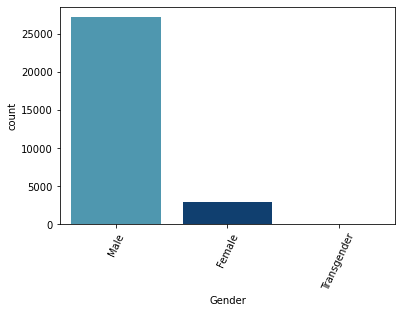

------------------------------------------------------
------------------------------------------------------


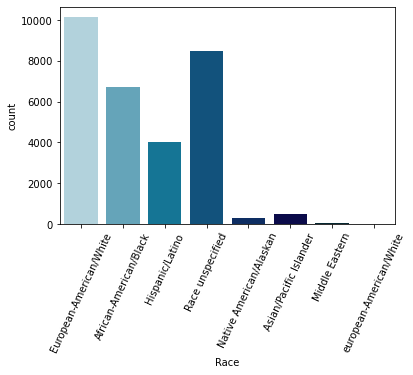

------------------------------------------------------
------------------------------------------------------


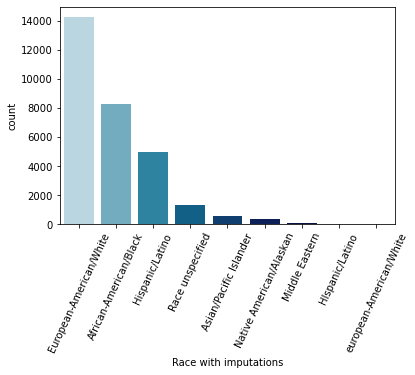

------------------------------------------------------
------------------------------------------------------


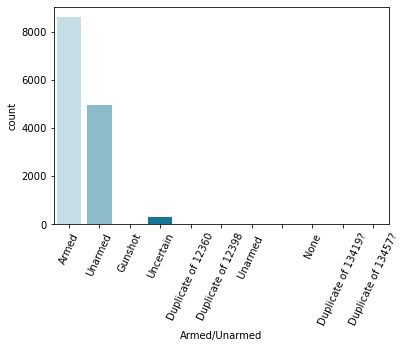

------------------------------------------------------
------------------------------------------------------


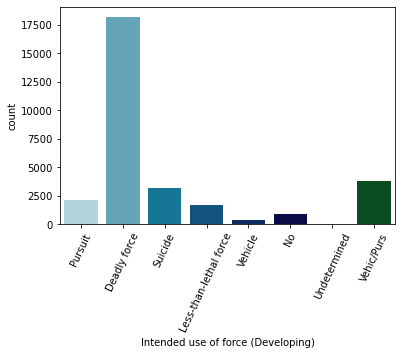

In [47]:
# univariate distributions
more_exclusions = ['Age', 
                   'Location of death (city)', 
                   'State', 
                   'Highest level of force', 
                   'Alleged weapon', 
                   'Aggressive physical movement', 
                   'Fleeing/Not fleeing', 
                   'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS', 
                   'Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS']

for column in df2.columns:
    if column not in exclusions and column not in useless_columns and column not in more_exclusions:
        sns.countplot(x=df2[column], data=df2, palette = 'ocean_r')
        print("------------------------------------------------------")
        print("------------------------------------------------------")
        plt.xticks(rotation=65)
        plt.show()


### Takeaways
- This FE dataset is much like the first MPL dataset from our first iteration where there are unnecessary columns (begin with Unnamed:), nulls, wide amount of text variation, and more.
- Columns can be renamed, values can be normalized, age bins, dummy variables and encoding can be done. 
- One main difference from this FE dataset is that two features are not going to be used for this second iteration (`Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS` and `Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS`).

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-prepare-and-split-data"></a>2nd Iteration: Prepare and Split Data

In [48]:
# grab cleaned data frame from wrangle.py
df2 = w.wrangle_new_data(cached=False)
df2.head()

,unique_id,age,gender,race,date_of_injury_resulting_in_death_month_day_year,location_of_death_zip_code,agency_or_agencies_involved,highest_level_of_force,armed_unarmed,alleged_weapon,...,had_no_weapon,had_other_weapon,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
7446,14050.0,20.0,male,black,2007-02-07,68111.0,omaha police department,gunshot,armed,edged weapon,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15243,12167.0,12.0,female,hispanic,2013-01-01,78375.0,texas department of public safety,medical emergency,unarmed,no_weapon,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15244,12171.0,26.0,male,white,2013-01-01,56001.0,mankato department of public safety,tasered,unarmed,no_weapon,...,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15245,12172.0,21.0,male,white,2013-01-01,54838.0,douglas county sheriff's office,gunshot,armed,firearm,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15246,12173.0,31.0,male,black,2013-01-01,68111.0,omaha police department,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# double check rows and columns
df2.shape

(13137, 37)

In [50]:
# double check no nulls
df2.isnull().sum()

unique_id                                           0
age                                                 0
gender                                              0
race                                                0
date_of_injury_resulting_in_death_month_day_year    0
location_of_death_zip_code                          0
agency_or_agencies_involved                         0
highest_level_of_force                              0
armed_unarmed                                       0
alleged_weapon                                      0
alleged_threat_lvl                                  0
fleeing_not_fleeing                                 0
brief_description                                   0
intended_use_of_force_developing                    0
fleeing                                             0
age_bins                                            0
is_asian_pacific islander                           0
is_black                                            0
is_hispanic                 

In [51]:
# double check data types
df2.dtypes

unique_id                                                  float64
age                                                        float64
gender                                                      object
race                                                        object
date_of_injury_resulting_in_death_month_day_year    datetime64[ns]
location_of_death_zip_code                                 float64
agency_or_agencies_involved                                 object
highest_level_of_force                                      object
armed_unarmed                                               object
alleged_weapon                                              object
alleged_threat_lvl                                          object
fleeing_not_fleeing                                         object
brief_description                                           object
intended_use_of_force_developing                            object
fleeing                                                    flo

In [52]:
# split the data using the split function in explore.py
train, validate, test = split(df2, stratify_by="alleged_threat_lvl")

# check split datasets
print('overall shape of dataframe:', df2.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

# work with training data
train.head()

overall shape of dataframe: (13137, 37)
train: (7356, 37)
validate: (3153, 37)
test: (2628, 37)


,unique_id,age,gender,race,date_of_injury_resulting_in_death_month_day_year,location_of_death_zip_code,agency_or_agencies_involved,highest_level_of_force,armed_unarmed,alleged_weapon,...,had_no_weapon,had_other_weapon,under 12,12-17,18-24,25-34,35-44,45-54,55-64,65+
27769,27652.0,48.0,male,unknown_race,2020-03-03,33187.0,miami-dade police department,gunshot,armed,edged weapon,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21171,17870.0,35.0,male,black,2016-07-02,28806.0,asheville police department,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26445,26220.0,61.0,male,white,2019-06-24,34224.0,charlotte county sheriff's office,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15302,12221.0,17.0,male,black,2013-01-11,1569.0,uxbridge police department,vehicle,unarmed,no_weapon,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16413,13305.0,29.0,male,white,2013-08-23,85032.0,mesa police department,gunshot,armed,firearm,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Takeaway
- We lost a little more than half of the data, but it is still more observations than our MPV dataset.
- Data is prepped/split and ready to be explored, modeled, and evaluated.

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-explore-data"></a>2nd Iteration: Explore Data

Address questions posed in planning



# <a name="2nd-iteration-visualizations"></a>• 2nd Iteration: Visualizations

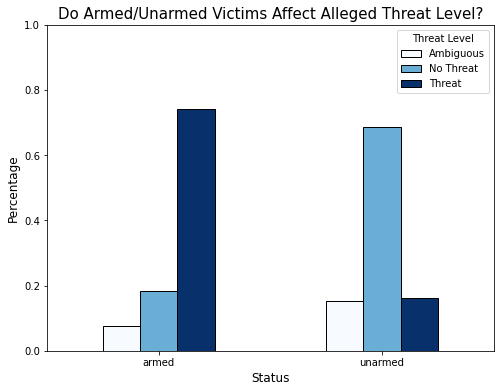

alleged_threat_lvl,ambiguous_threat,no_threat,threat
armed_unarmed,,,
armed,0.074705,0.184142,0.741153
unarmed,0.151188,0.685745,0.163067


In [53]:
# visualize armed/unarmed vs alleged threat level
ax = pd.crosstab(train.armed_unarmed, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Ambiguous', 'No Threat', 'Threat'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Do Armed/Unarmed Victims Affect Alleged Threat Level?", fontsize = 15)
plt.xlabel("Status", fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.ylim([0.0, 1.0])
plt.xticks(rotation=0)
plt.show()

# get percentages df
percentages = pd.crosstab(train.armed_unarmed, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- As expected, armed victims are at a hight threat level, while unarmed victims are not considered a threat. 
- Still, there are some armed victims considered as not a threat, while some unarmed victims are considered threats. 
- There is a more likely chance that ambiguous threats are unarmed.

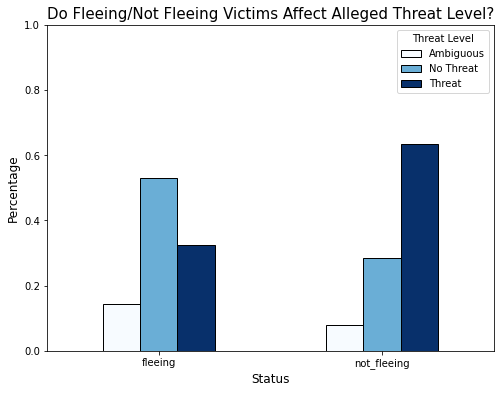

alleged_threat_lvl,ambiguous_threat,no_threat,threat
fleeing_not_fleeing,,,
fleeing,0.144911,0.529701,0.325388
not_fleeing,0.080416,0.286017,0.633567


In [54]:
# visualize fleeing_not_fleeing vs alleged threat level
ax = pd.crosstab(train.fleeing_not_fleeing, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Ambiguous', 'No Threat', 'Threat'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Do Fleeing/Not Fleeing Victims Affect Alleged Threat Level?", fontsize = 15)
plt.xlabel("Status", fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.ylim([0.0, 1.0])
plt.xticks(rotation=0)
plt.show()

# get percentages df
percentages = pd.crosstab(train.fleeing_not_fleeing, train.alleged_threat_lvl, normalize = 'index')
percentages

### Takeaways
- Fleeing victims have a higher chance of not being a threat.
- Non-fleeing victims have a higher probability of being threats. This could be due to victims fighting back/attacking law enforcement instead of fleeing.  
- Some fleeing victims are considered attacks. Possibly because they are fleeing in vehicles and putting others in danger?

In [55]:
# explore word counts for brief_description
nlp = train[['brief_description', 'alleged_threat_lvl']]
nlp

,brief_description,alleged_threat_lvl
27769,jose gainza allegedly stabbed and killed his d...,threat
21171,police said they were called out to a report o...,threat
26445,"around 9 p.m., a call came into 911 that bradl...",threat
15302,"rome alexander ives, the driver of a stolen fo...",no_threat
16413,officers attempted to detain jonathan tricaric...,threat
...,...,...
16131,merlin factor had allegedly thrown a rock thro...,ambiguous_threat
15416,police attempted to pull over javier silva-mor...,no_threat
21738,a deputy tried to stop a vehicle on hamilton a...,no_threat
17277,"shane vanmeter, 27, was allegedly fleeing a po...",no_threat


In [56]:
# define function to clean text from brief description column
ADDITIONAL_STOPWORDS = ['said', '008', 'around', 'two']

def clean(text):
    '''
    This function cleans up text data.
    '''
    
    #lemmatize
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    #normalize
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return ' '.join([wnl.lemmatize(word) for word in words if word not in stopwords])

In [57]:
# apply the clean function
nlp = nlp.brief_description.apply(clean)
nlp

27769    jose gainza allegedly stabbed killed daughteri...
21171    police called report shot fired pisgah view ap...
26445    9 pm call came 911 bradley rundle fired gun mu...
15302    rome alexander ives driver stolen ford explore...
16413    officer attempted detain jonathan tricarico 29...
                               ...                        
16131    merlin factor allegedly thrown rock someone wi...
15416    police attempted pull javier silvamorales 31 b...
21738    deputy tried stop vehicle hamilton avenue 345 ...
17277    shane vanmeter 27 allegedly fleeing police sto...
22328    euclid police officer fatally shot luke stewar...
Name: brief_description, Length: 7356, dtype: object

In [58]:
# check how many words appear for each threat level and percentage
levels = pd.concat([train.alleged_threat_lvl.value_counts(),
                    round(train.alleged_threat_lvl.value_counts(normalize=True), 2)], axis=1)

levels.columns = ['n', 'percent']

levels

,n,percent
threat,3846,0.52
no_threat,2748,0.37
ambiguous_threat,762,0.10


In [59]:
# breaking up data into each alleged threat level

# words that appear in threat
threat_words = clean(' '.join(train[train.alleged_threat_lvl == 'threat'].brief_description))

# words that appear in no_threat
no_threat_words = clean(' '.join(train[train.alleged_threat_lvl == 'no_threat'].brief_description))

# words that appear in ambiguous_threat
ambiguous_words = clean(' '.join(train[train.alleged_threat_lvl == 'ambiguous_threat'].brief_description))

# all of the words 
all_words = clean(' '.join(train.brief_description))

In [60]:
# check how often each of the words occurs
threat_freq = pd.Series(threat_words.split()).value_counts()
no_threat_freq = pd.Series(no_threat_words.split()).value_counts()
ambiguous_freq = pd.Series(ambiguous_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

print('Threat Words:')
print(threat_freq)
print('--------------------------')
print('No Threat Words:')
print(no_threat_freq)
print('--------------------------')
print('Ambiguous Threat Words:')
print(ambiguous_freq)
print('--------------------------')
print('All Words:')
print(all_freq)

Threat Words:
officer     5610
police      4466
shot        3711
killed      2628
deputy      1818
            ... 
kaley          1
heeter         1
gauthier       1
catching       1
marathon       1
Length: 10376, dtype: int64
--------------------------
No Threat Words:
police          3205
officer         1836
killed          1363
vehicle         1325
car             1090
                ... 
instantlythe       1
jacklyn            1
lillard            1
1229               1
manos              1
Length: 9651, dtype: int64
--------------------------
Ambiguous Threat Words:
police        1095
officer        967
shot           713
killed         509
car            387
              ... 
butte            1
mccandless       1
teller           1
goras            1
discharged       1
Length: 4163, dtype: int64
--------------------------
All Words:
police        8766
officer       8413
shot          5400
killed        4500
deputy        2927
              ... 
highly           1
hornbuckle 

In [61]:
# combine frequencies together to get one resulting df
word_counts = (pd.concat([all_freq, 
                          threat_freq, 
                          no_threat_freq, 
                          ambiguous_freq], axis=1, sort=True)
                .set_axis(['All', 
                           'Threat', 
                           'No Threat', 
                           'Ambiguous'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16322 entries, 01 to zyonne
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   All        16322 non-null  int64
 1   Threat     16322 non-null  int64
 2   No Threat  16322 non-null  int64
 3   Ambiguous  16322 non-null  int64
dtypes: int64(4)
memory usage: 637.6+ KB


In [62]:
# What are the most frequently occuring words in the descriptions per level?
word_counts.sort_values(by='All', ascending=False).head(10)

,All,Threat,No Threat,Ambiguous
police,8766,4466,3205,1095
officer,8413,5610,1836,967
shot,5400,3711,976,713
killed,4500,2628,1363,509
deputy,2927,1818,763,346
man,2449,1700,484,265
vehicle,2384,755,1325,304
car,2198,721,1090,387
allegedly,2101,1156,713,232
gun,1820,1362,231,227


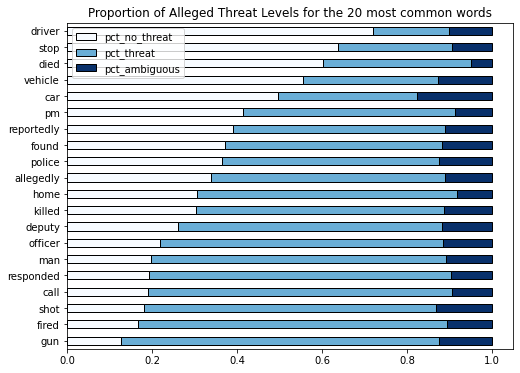

In [63]:
# visualize percentage for each alleged threat level
(word_counts
 .assign(pct_no_threat=word_counts['No Threat'] / word_counts['All'],
         pct_threat=word_counts['Threat'] / word_counts['All'], 
         pct_ambiguous=word_counts['Ambiguous'] / word_counts['All'])
 .sort_values(by='All')
 [['pct_no_threat', 'pct_threat', 'pct_ambiguous']]
 .tail(20)
 .sort_values('pct_no_threat')
 .plot.barh(stacked=True, figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black"))

plt.title('Proportion of Alleged Threat Levels for the 20 most common words')
plt.show()

### Takeaways
- Top words for no threat levels are 'driver', 'stop', 'died', 'vehicle', 'car'. Possibly people fleeing?
- Top words for levels considered as threats are 'gun', 'fired', 'shot', 'man', 'officer', 'killed'. Possibly people that were harming, or close to harming, others. 
- Ambiguous threat levels have the least amount of words. 

In [64]:
# variables for most common Bigrams for each alleged threat level
threat_bigrams = (pd.Series(nltk.ngrams(threat_words.split(), 2))
                      .value_counts()
                      .head(20))
no_threat_bigrams = (pd.Series(nltk.ngrams(no_threat_words.split(), 2))
                      .value_counts()
                      .head(20))
ambiguous_bigrams = (pd.Series(nltk.ngrams(ambiguous_words.split(), 2))
                      .value_counts()
                      .head(20))
all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2))
                      .value_counts()
                      .head(20))

In [65]:
# variables for most common Trigrams for each alleged threat level
threat_trigrams = (pd.Series(nltk.ngrams(threat_words.split(), 3))
                      .value_counts()
                      .head(20))
no_threat_trigrams = (pd.Series(nltk.ngrams(no_threat_words.split(), 3))
                      .value_counts()
                      .head(20))
ambiguous_trigrams = (pd.Series(nltk.ngrams(ambiguous_words.split(), 3))
                      .value_counts()
                      .head(20))
all_trigrams = (pd.Series(nltk.ngrams(all_words.split(), 3))
                      .value_counts()
                      .head(20))

### Threat Bigrams / Trigrams and Word Clouds

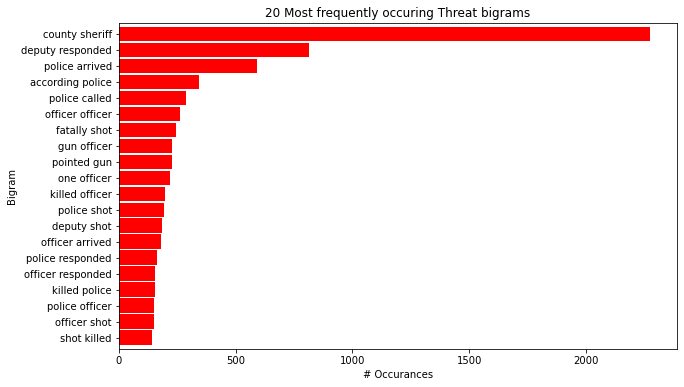

In [66]:
# bigrams
threat_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Threat bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = threat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

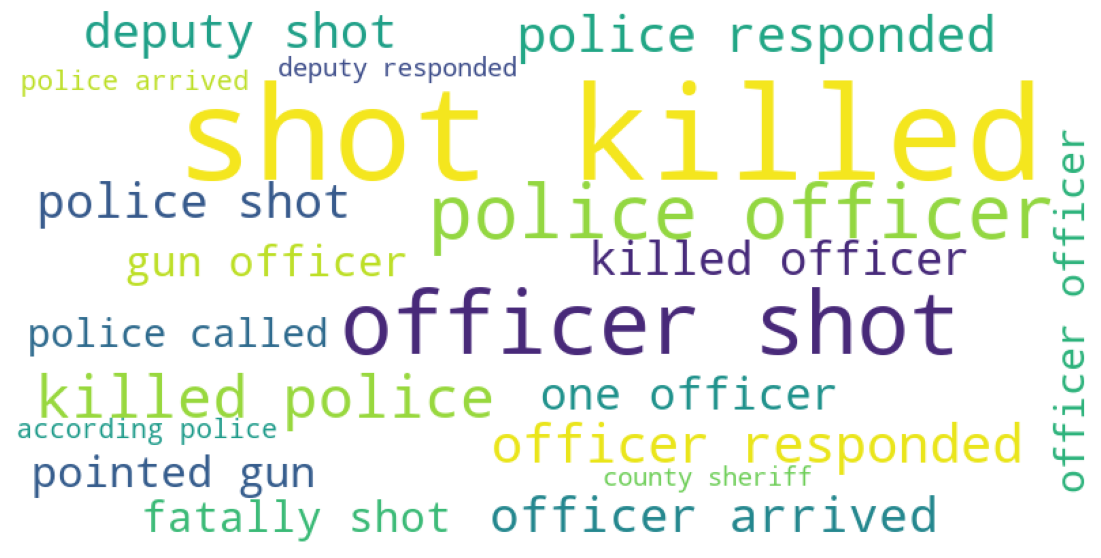

In [67]:
# use threat bigrams to make word cloud
data = {k[0] + ' ' + k[1]: v for k, v in threat_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

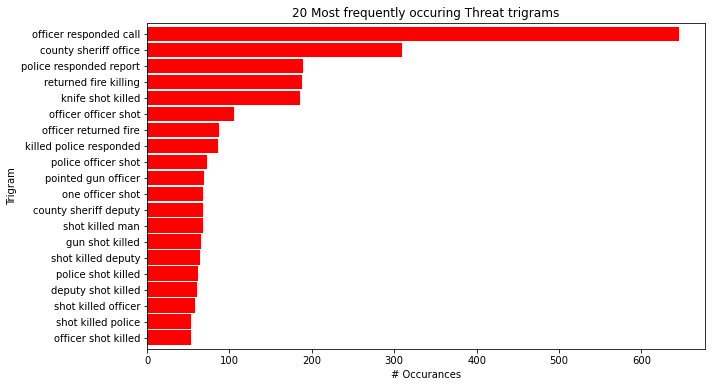

In [68]:
# trigrams
threat_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Threat trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = threat_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

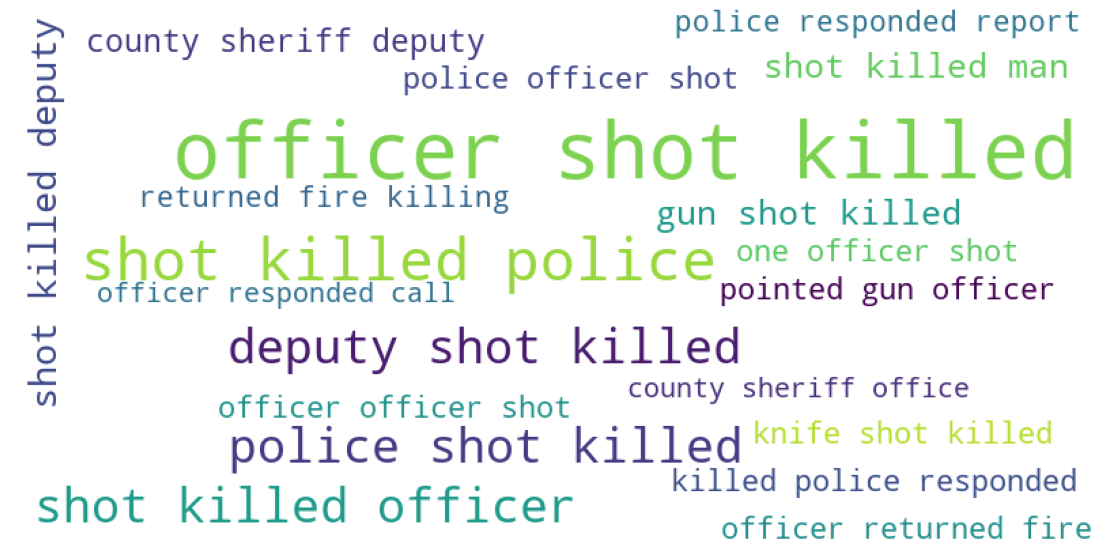

In [69]:
# use threat trigrams to make word cloud
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in threat_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### No Threat Bigrams / Trigrams and Word Clouds

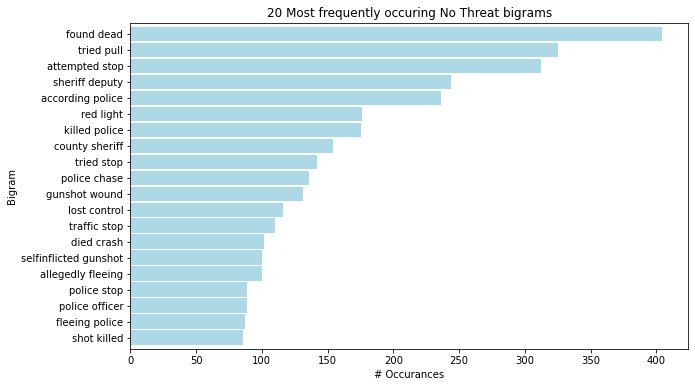

In [70]:
# bigrams
no_threat_bigrams.sort_values().plot.barh(color='lightblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring No Threat bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = no_threat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


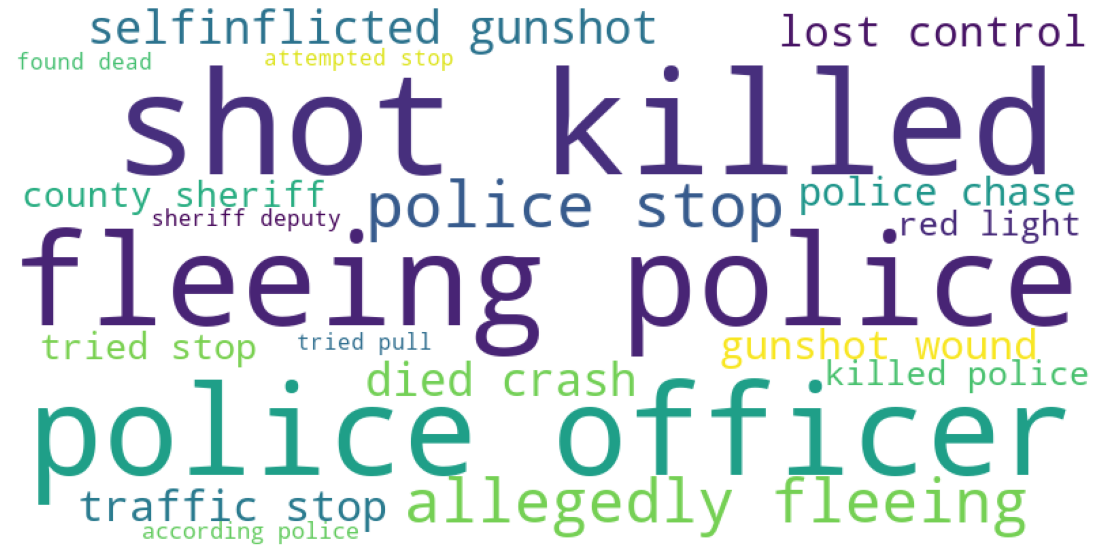

In [71]:
# use no threat bigrams to make word cloud
data = {k[0] + ' ' + k[1]: v for k, v in no_threat_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

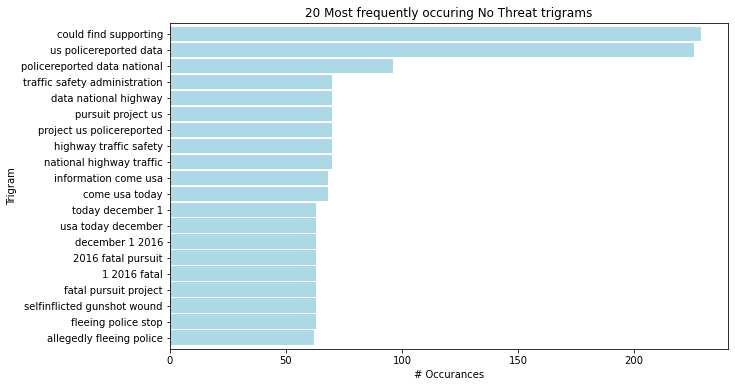

In [72]:
# trigrams
no_threat_trigrams.sort_values().plot.barh(color='lightblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring No Threat trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = no_threat_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

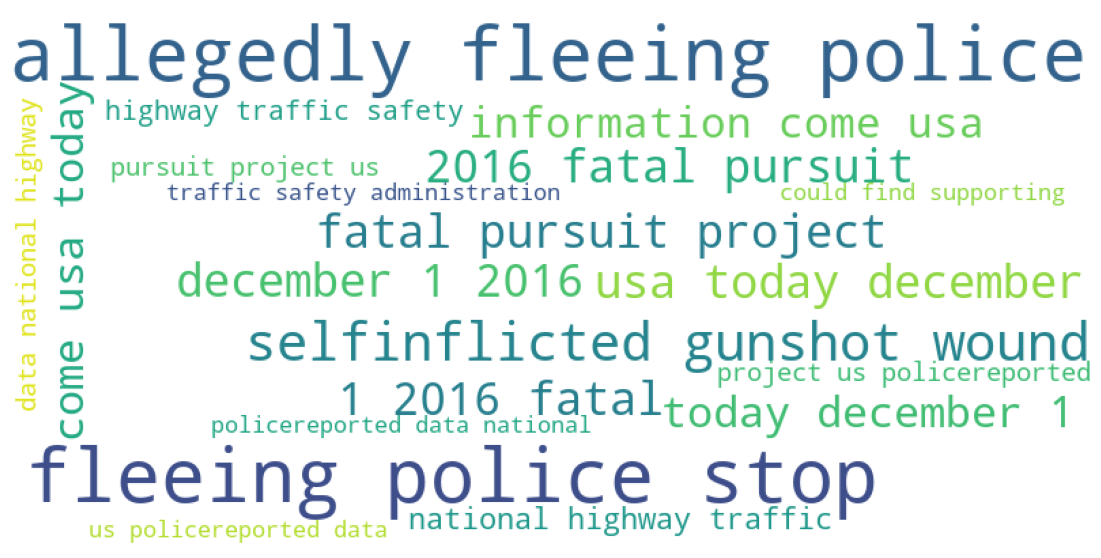

In [73]:
# use no threat trigrams to make word cloud
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in no_threat_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Ambiguous Bigrams / Trigrams and Word Clouds

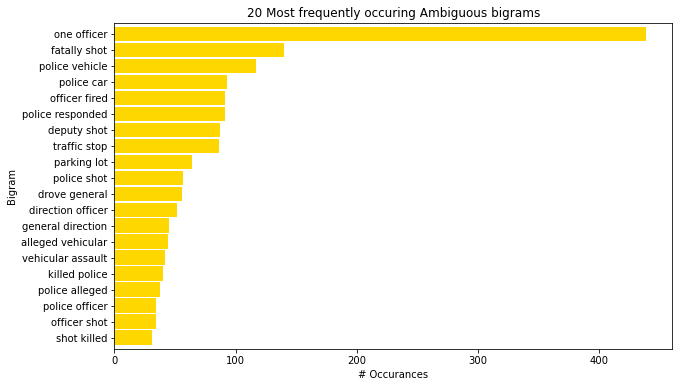

In [74]:
# bigrams
ambiguous_bigrams.sort_values().plot.barh(color='gold', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Ambiguous bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ambiguous_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

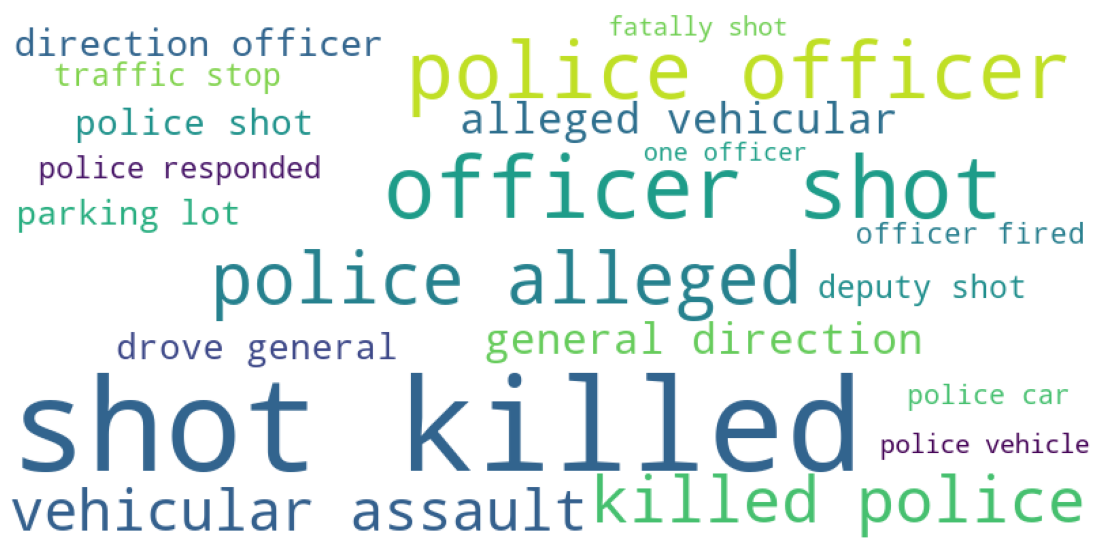

In [75]:
# use ambiguous bigrams to make word cloud
data = {k[0] + ' ' + k[1]: v for k, v in ambiguous_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

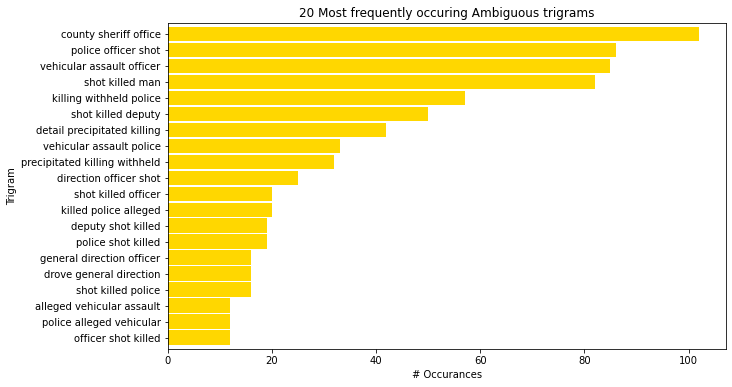

In [76]:
# trigrams
ambiguous_trigrams.sort_values().plot.barh(color='gold', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Ambiguous trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ambiguous_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

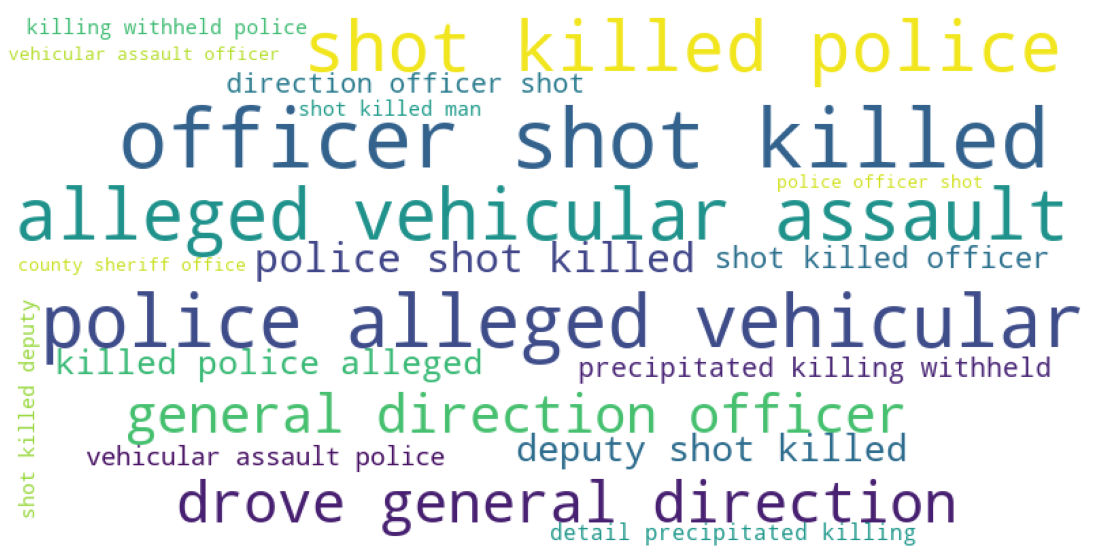

In [77]:
# use ambiguous trigrams to make word cloud
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ambiguous_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### All Alleged Threat Levels Bigrams / Trigrams and Word Clouds

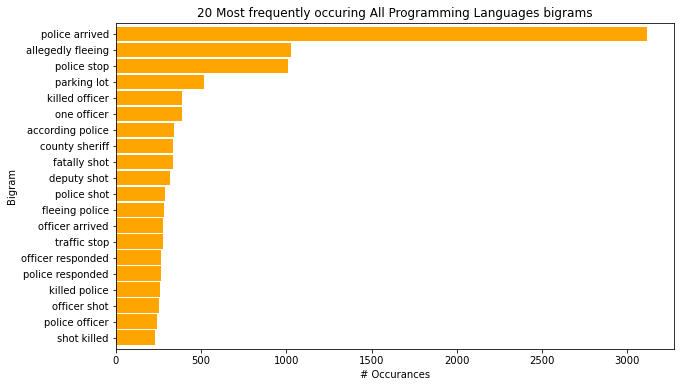

In [78]:
# bigrams
all_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring All Programming Languages bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = all_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

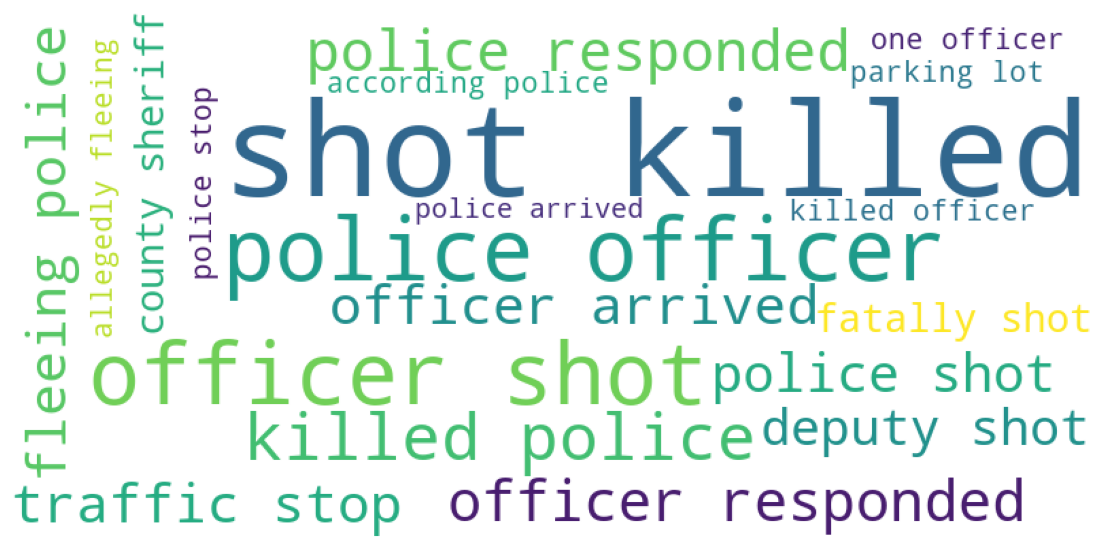

In [79]:
# use all bigrams to make word cloud
data = {k[0] + ' ' + k[1]: v for k, v in all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

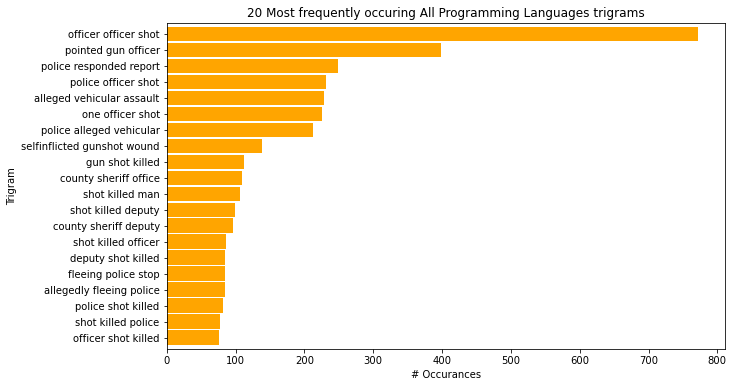

In [80]:
# trigrams
all_trigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring All Programming Languages trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = all_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

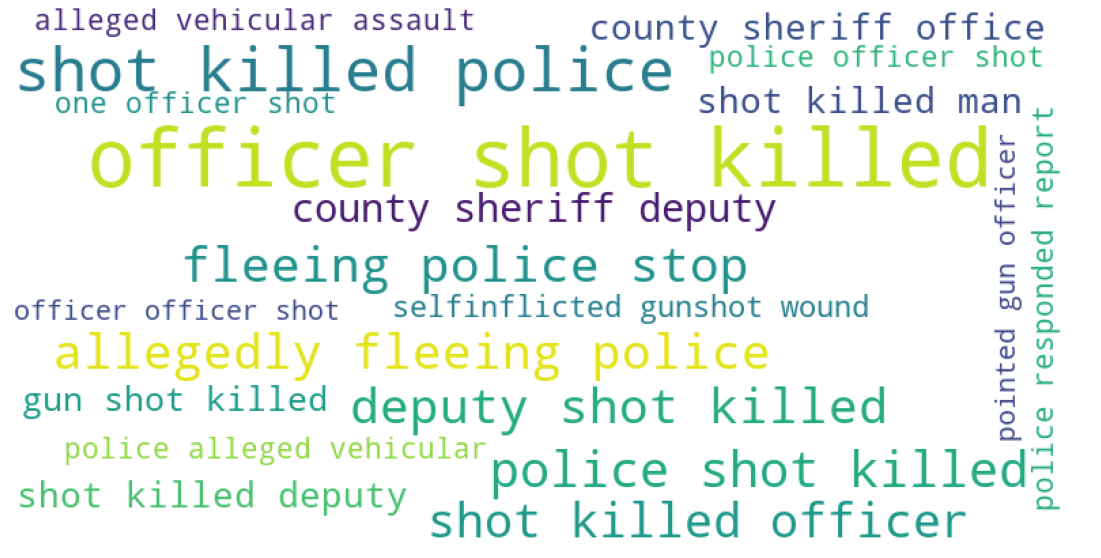

In [81]:
# use all trigrams to make word cloud
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in all_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

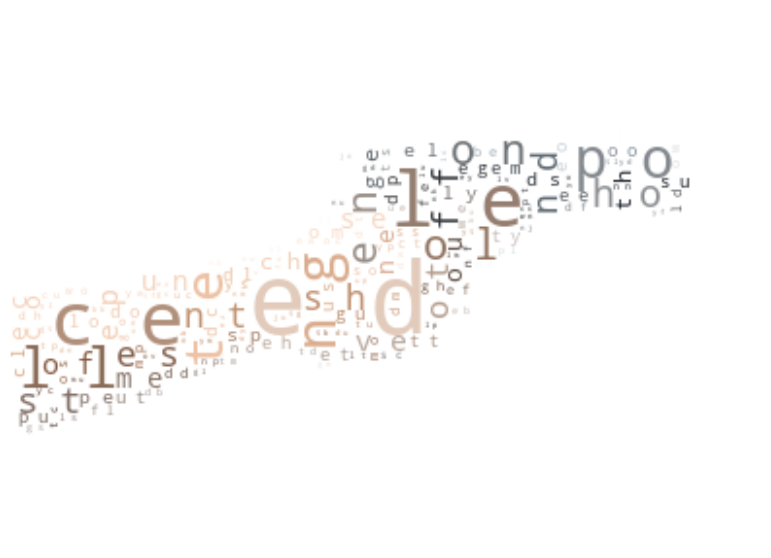

In [82]:
fig = plt.figure(figsize=(20, 10))
mask = np.array(Image.open("gun-ready-shoot.jpeg"))
wc = WordCloud(mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42)
wc.generate(' '.join(all_words))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-hypothesis-testing"></a>• 2nd Iteration: Hypothesis Testing

In [83]:
# chi2 test for armed/unarmed victims vs alleged threat level
exp.chi2_matts(train, 'armed_unarmed', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 342  843 3393]
 [ 420 1905  453]]
---
Expected

[[ 474.23001631 1710.21533442 2393.55464927]
 [ 287.76998369 1037.78466558 1452.44535073]]
---

chi^2 = 2367.1131
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


In [84]:
# chi2 test for fleeing_not_fleeing victims vs alleged threat level
exp.chi2_matts(train, 'fleeing_not_fleeing', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 383 1400  860]
 [ 379 1348 2986]]
---
Expected

[[ 273.78548124  987.35236542 1381.86215334]
 [ 488.21451876 1760.64763458 2464.13784666]]
---

chi^2 = 644.7738
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


### Takeaways
- Both statistical tests rejected the null hypothesis.
    - 1st Chi^2 test demonstrates that armed/unarmed victims are dependent on alleged threat level.
    - 2nd Chi^2 test demonstrates that fleeing/not fleeing victims are dependent on alleged threat level.

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-modeling"></a>2nd Iteration: Modeling

In [85]:
# encode target variable 
train.alleged_threat_lvl = LabelEncoder().fit_transform(train.alleged_threat_lvl)

In [86]:
# set up X inputs and y target variable for each split
X_train = train.drop(columns=['alleged_threat_lvl'])
y_train = train.alleged_threat_lvl

X_validate = validate.drop(columns=['alleged_threat_lvl'])
y_validate = validate.alleged_threat_lvl

X_test = test.drop(columns=['alleged_threat_lvl'])
y_test = test.alleged_threat_lvl

In [87]:
# dropping columns that are not numeric datatypes
dropcols = ['unique_id', 'gender', 'race',\
       'date_of_injury_resulting_in_death_month_day_year',\
       'location_of_death_zip_code', 'agency_or_agencies_involved',\
       'highest_level_of_force', 'armed_unarmed', 'alleged_weapon',\
       'alleged_threat_lvl', 'fleeing_not_fleeing', 'brief_description',\
       'intended_use_of_force_developing', 'age_bins']

X_train = train.drop(columns=dropcols)
X_validate = validate.drop(columns=dropcols)
X_test = test.drop(columns=dropcols)

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-feature-importance"></a>• 2nd Iteration: Feature Importance

In [88]:
# select k best
f_features = select_kbest(X_train, y_train, 15)
f_features

['age',
 'fleeing',
 'is_hispanic',
 'is_unknown_race',
 'is_unarmed',
 'had_blunt object',
 'had_edged weapon',
 'had_firearm',
 'had_no_weapon',
 'had_other_weapon',
 'under 12',
 '12-17',
 '18-24',
 '35-44',
 '45-54']

In [89]:
# recursive feature elimination (rfe)
rfe_features = rfe(X_train, y_train, 15)
rfe_features

['fleeing',
 'is_middle eastern',
 'is_native_american',
 'is_unknown_race',
 'is_unarmed',
 'had_blunt object',
 'had_edged weapon',
 'had_firearm',
 'had_no_weapon',
 'had_other_weapon',
 'under 12',
 '18-24',
 '25-34',
 '35-44',
 '45-54']

In [90]:
# combine features
combo_feats = list(set(f_features + rfe_features))
print(len(combo_feats))
combo_feats

18


['had_no_weapon',
 'is_native_american',
 '12-17',
 'fleeing',
 '18-24',
 'is_hispanic',
 'is_unknown_race',
 'is_middle eastern',
 'is_unarmed',
 'had_firearm',
 'had_other_weapon',
 'age',
 'had_blunt object',
 'had_edged weapon',
 'under 12',
 '25-34',
 '35-44',
 '45-54']

In [91]:
# specify combined features that reduces multicollinearity
combo_feats = ['fleeing',
               'had_other_weapon',
               'is_middle eastern',
               '12-17',
               'had_no_weapon',
               'is_native_american',
               '25-34',
               '18-24',
               'under 12',
               'had_firearm',
               'is_hispanic']
 
print(len(combo_feats))

11


[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-identify-baseline"></a>• 2nd Iteration: Identify Baseline

### Key:
- 2 = threat

- 1 = no threat

- 0 = abiguous threat

In [92]:
# baseline prediction: the most prevalent class in training dataset(the mode)
train.alleged_threat_lvl.value_counts()

2    3846
1    2748
0     762
Name: alleged_threat_lvl, dtype: int64

In [93]:
# baseline model would be to predict threat (2) since it is most prevalant
# baseline accuracy:
baseline_accuracy = (train.alleged_threat_lvl == 2).mean()

print(f'baseline accuracy: {baseline_accuracy: .4}')

baseline accuracy:  0.5228


[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-train"></a>• 2nd Iteration: Model on Train

### Decision Tree

In [94]:
# create Decision Tree model (specifying max_depth argument and combo_feats)
dt = DecisionTreeClassifier(max_depth=3, random_state=123)

# fit model on combo_feats
dt.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = dt.predict(X_train[combo_feats])

# compute accuracy
dt_train_acc = round(dt.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): 0.7187


### Random Forest

In [95]:
# create Random Forest model (specifying max_depth/min_samples_leaf arguments and combo_feats)
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

# fit model on combo_feats
rf.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = rf.predict(X_train[combo_feats])

# compute accuracy
rf_train_acc = round(rf.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): 0.7191


### K-Nearest Neighbor (KNN)

In [96]:
# create KNN model (specifying n_neighbors argument and combo_feats)
knn = KNeighborsClassifier(n_neighbors=20)

# fit model on combo_feats
knn.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = knn.predict(X_train[combo_feats])

# compute accuracy
knn_train_acc = round(knn.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of KNN classifier on combo_feats (n_neighbors = 20): {:4f}'
     .format(knn.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of KNN classifier on combo_feats (n_neighbors = 20): 0.712887


### Logistic Regression

In [97]:
# create Logistic Regression model (default parameters, specifying combo_feats)
logit = LogisticRegression(random_state=123)

# fit model on combo_feats
logit.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = logit.predict(X_train[combo_feats])

# compute accuracy
logit_train_acc = round(logit.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Logistic Regression classifier on combo_feats (default parameters): {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Logistic Regression classifier on combo_feats (default parameters): 0.7178


### Takeways:
- **Decision Tree** model (dt) specifying max_depth argument of 3 and using combo_feats:
    - Score of 71.87% accuracy
    
    
    
- **Random Forest** model (rf) specifying max_depth argument of 5, min_samples_leaf argument of 3 and using combo_feats:
    - Score of 71.91% accuracy
    
    
    
- **K-Nearest Neighbor** model (knn) specifying n_neighbors argument of 20 and using combo_feats:
    - Score of 71.29% accuracy
    
    
    
- **Logistic Regression** model (logit) using default parameters and combo_feats:
    - Score of 71.78% accuracy

Next, compare scores to validate (out-of-sample data).

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-validate"></a>• 2nd Iteration: Model on Validate

In [98]:
# dt's metrics on validate

# evaluate on validate sample
y_pred = dt.predict(X_validate[combo_feats])

# compute accuracy
dt_val_acc = round(dt.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Decision Tree classifier on train set: {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on train set: 0.7187
--------------------------------------------------------------
Decision Tree classifier on validate set:


ValueError: Mix of label input types (string and number)

In [ ]:
# rf's metrics on validate

# evaluate on validate sample
y_pred = rf.predict(X_validate[combo_feats])

# compute accuracy
rf_val_acc = round(rf.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Random Forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

In [ ]:
# knn's metrics on validate

# evaluate on validate sample
y_pred = knn.predict(X_validate[combo_feats])

# compute accuracy
knn_val_acc = round(knn.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of KNN classifier on train set: {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

In [ ]:
# logit's metrics on validate

# evaluate on validate sample
y_pred = logit.predict(X_validate[combo_feats])

# compute accuracy
logit_val_acc = round(logit.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Logistic Regression classifier on train set: {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

In [ ]:
# build dataframe to record accuracy (starting with decision tree)
metric_df = pd.DataFrame(data=[{
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy': round(dt_val_acc, 4)}])

# append dataframe to record accuracy on random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on knn
metric_df = metric_df.append({
    'Model': 'K-Nearest Neighbor', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(knn_train_acc, 4),
    'Validate Accuracy':round(knn_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on logistic regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4)}, ignore_index=True)


metric_df

### Takeaways

**Decision Tree** is the best-performing model and will be evaluated on test data.


[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-test"></a>• 2nd Iteration: Model on Test

In [ ]:
# evaluate on test sample 
y_pred_test = dt.predict(X_test[combo_feats])

# compute accuracy
dt_test_acc = round(dt.score(X_test[combo_feats], y_test), 4)

print("Random Forest Model:")
print(classification_report(y_test, y_pred_test))

In [ ]:
# append dataframe to record accuracy on final decision tree model
metric_df = metric_df.append({
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy':round(dt_val_acc, 4),
    'Test Accuracy': round(dt_test_acc, 4)}, ignore_index=True)

metric_df

### What is ROC?

ROC curves describe the **trade-off between the true positive rate (TPR) and false positive (FPR) rate along different probability thresholds** for a classifier. True positive rate is also known as recall and sometimes Sensitivity — it’s a measure of how well you can find the needle in a haystack.

**The receiver operating characteristic (ROC) curve has become the p-value of machine learning classification** — it’s very frequently used, misused, misinterpreted, and mis-maligned.

However, ROC curves (like p-values) are useful when used right. By that, I mean they are **useful when not used as a rote score**, but when they form part of a nuanced description of a model’s ability to help solve the problem at hand (e.g. in the case of minority class identification, do they perform better than a random guess or assuming all instances are in the majority class).

### What is AUC?

Area Under the Curve gives the rate of successful classification by the model. The AUC makes it easy to compare the ROC curve of one model to another.




In [ ]:
(y_test == 'threat').mean()

In [ ]:
train.alleged_threat_lvl.value_counts()

In [ ]:
from sklearn import preprocessing
preprocessing.label_binarize(y_train, classes=['threat', 'no_threat', 'ambiguous_threat'])

In [ ]:
y_trainbin = preprocessing.label_binarize(y_train, classes=['threat', 'no_threat', 'ambiguous_threat'])

In [ ]:
np.unique(y_trainbin)

In [ ]:
y_train = preprocessing.label_binarize(y_train, classes=['threat', 'no_threat', 'ambiguous_threat'])
#fit model on combo_feats
rf.fit(X_train[combo_feats], y_train)


In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn import preprocessing

plt.figure(figsize=(10,6))

y_pred = rf.predict_proba(X_test[combo_feats])[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red', lw=2, label=f'Random Forest (area = %0.4f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '-', label = 'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [ ]:
# # Plot ROC Curve

# from sklearn.metrics import plot_roc_curve
# from sklearn.svm import SVC

# #train a support vector classifier on train 
# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)

# #plot ROC curve on test data
# svc_disp = plot_roc_curve(svc, X_test, y_test)

# ax = plt.gca()
# rf_disp = plot_roc_curve(rf, X_test[combo_feats], y_test, ax=ax, alpha=0.8)
# svc_disp.plot(ax=ax, alpha=0.8, color = 'blue')
# plt.title('')
# plt.show()

In [ ]:
combo_feats


In [ ]:
rfcn = pd.DataFrame(data = y_test)
rfcn['alleged_threat_lvl'] = rfcn['alleged_threat_lvl'].astype(str)
rfcn.info()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

In [ ]:
est = rf.estimators_

In [ ]:
# Our Random Forest consists of 100 trees
print(len(rf.estimators_))

In [ ]:
# Find feature importance
print(rf.feature_importances_)

featimp = pd.DataFrame(rf.feature_importances_)
featimp['combo_feats'] = combo_feats



feature_names = combo_feats

plt.figure(figsize=(5, 5))
plt.barh(feature_names, rf.feature_importances_)
plt.title('Which Features are Better Predictors?')


In [ ]:
metric_df

[Jump to Table of Contents](#toc)
___
# <a name="drivers"></a>Drivers

- The top drivers of predicting a victim's threat level were encounter type of incident, gender, race, armed/unarmed status, mental illness, age, geography, fleeing events, and body camera reports.
- These drivers can be used to shed light on changes to be made in law enforcement and to help law enforcement agencies spot risk factors, so they may step in before risk transforms into actual harm.

[Jump to Table of Contents](#toc)
___
# <a name="conclusion"></a>Conclusion



### Takeaways
- All models had roughly the same score for train and validate sets.
- K-Nearest neighbor model performed the worst on out-of-sample data.
- The best performing model uses a Random Forest algorithm and combined features from Select K Best and Recursive Feature Elimination lists.
- Our final Random Forest model increased by 21% from a baseline accuracy of 51% to 72% accuracy on out-of-sample data.


### Next Steps
- Fill in missing values manually as best as possible based on the description column in the dataset (large amount of data missing). 
- Natural language processing exploration on description of incident. 


#### Report containing summarization of notebook can be found [here](link to presentation).

[Jump to Table of Contents](#toc)

<a id='bottom'></a>